In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import glob
import os
import peakutils
import datetime
import warnings
import logging
from jupyterthemes import jtplot

In [135]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *
warnings.filterwarnings("ignore")

jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
# plt.rcParams['errorbar.capsize'] = 8

In [136]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Cl2p' : 0.891,
            'Br3p' : 1.054, 'Br3d' : 1.054, 
            'Ru3d': 4.273, 'Ir4d': 1.84, 'P2p': 0.486, 'F1s': 1,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Si2p': 0.339})

## Pre-processing of data Tectomer on qITO
1- Preparation in Zaragoza dip-coating (June 2021)
Compare to APTES

## Import data

In [137]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if (' ' not in f) and ('/proc' not in f):
        files_new.append(f)

files = files_new
for f in files:
    print(f)

/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/20210427_ITO_APTES_thin.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/20210708_ITO_tectomer.xy
/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/20210920_2-qITO_Tectomer2tail_dip_coating.xy


In [158]:
experiments = [xps_data_import(path=f) for f in files]
experiments[1].name = 'ITO_tectomer_dropcoating'
experiments[2].name = 'ITO_tectomer_dipcoating'

# Align spectra

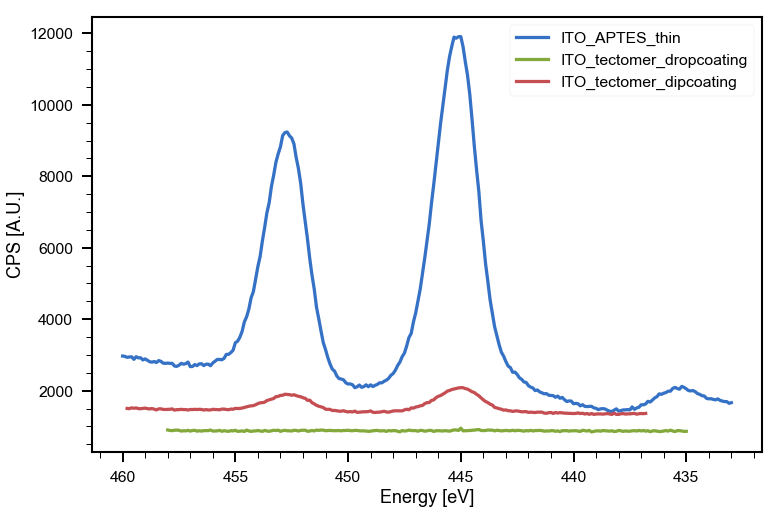

In [159]:
plt.figure(figsize=(12, 8))
for xp in experiments:
    shift = find_shift(xp, experiments[0], region='In3d')
    align_dfx(xp, shift, inplace=True)
    plot_region(xp, 'In3d')

# Plot raw spectra

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


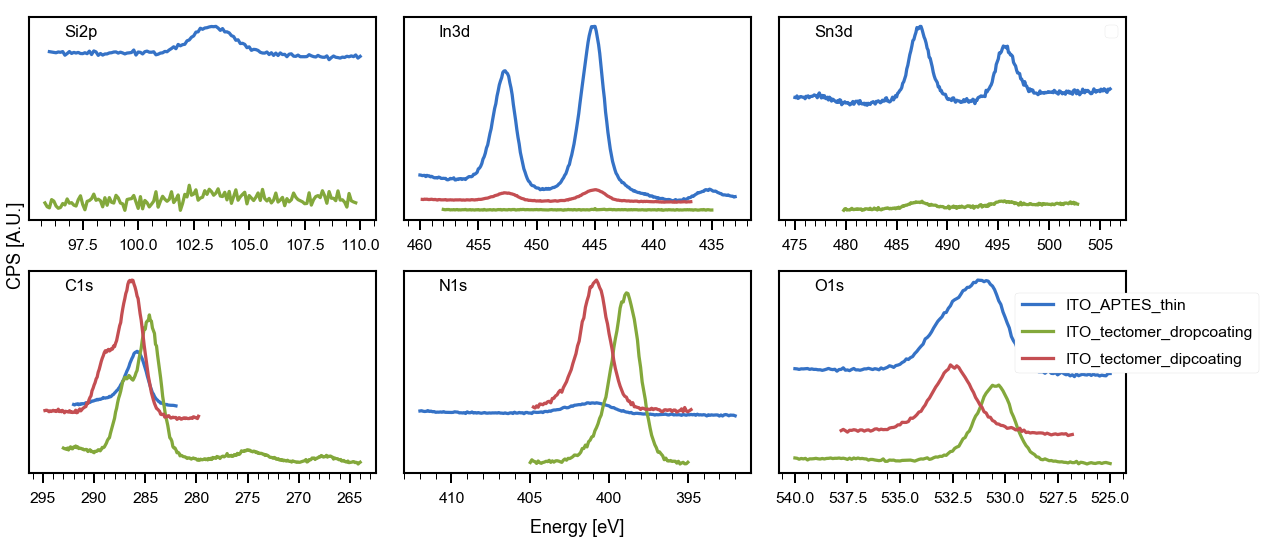

In [160]:
regions = ['Si2p', 'In3d', 'Sn3d', 'C1s', 'N1s', 'O1s']
plot_xp_regions(experiments, regions, ncols=3);

# BG subtraction

## Bulk subtract background

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


KeyError on  'Cl2p'
KeyError on  'F1s'
KeyError on  'La3d'
KeyError on  'Si2p'
KeyError on  'Sn3d'


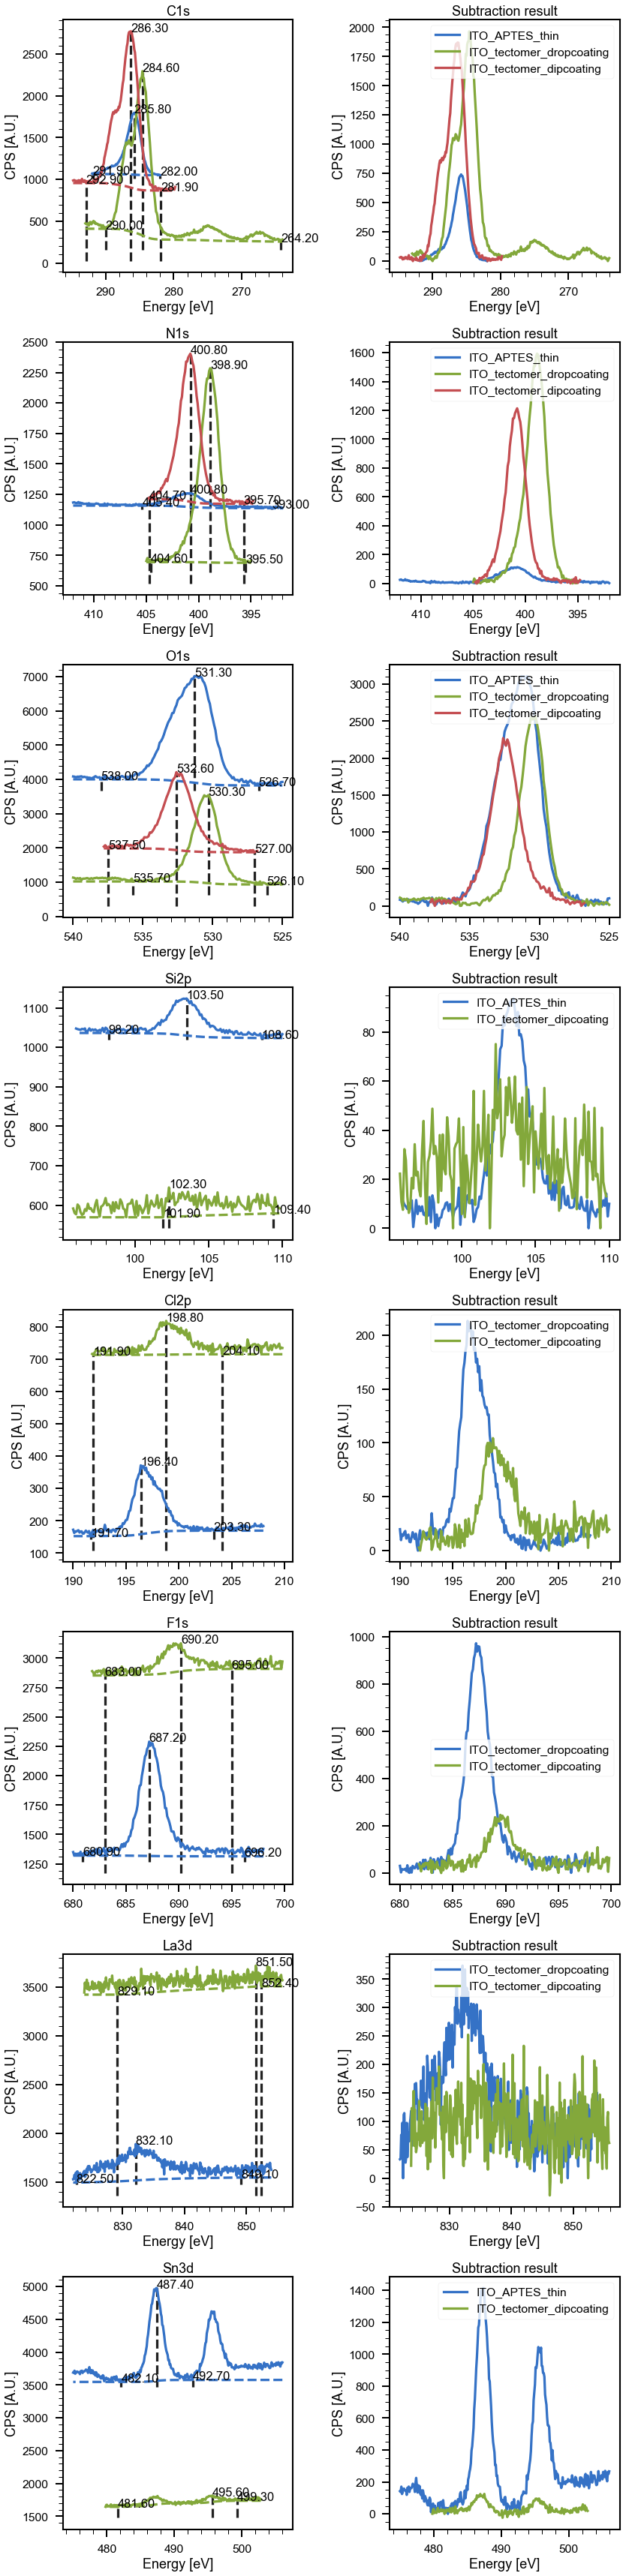

In [161]:
regions = ['C1s', 'N1s', 'O1s', 'Si2p', 'Cl2p', 'F1s', 'La3d', 'Sn3d']
bg_exps = bulk_bg_subtract(experiments, regions)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Max iterations exceeded, subtract linear baseline


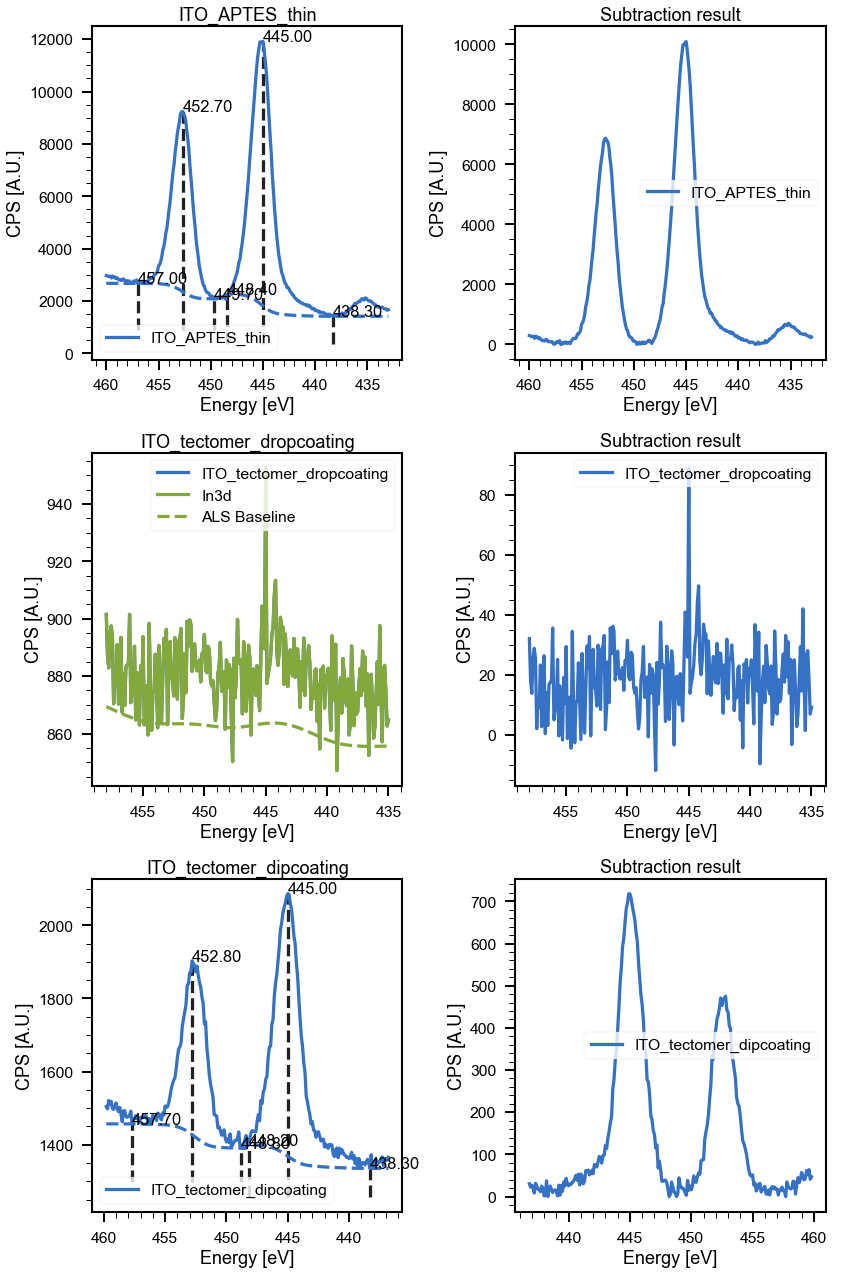

In [162]:
bg_exps = region_2bg_subtract(bg_exps, 'In3d', 448.40)

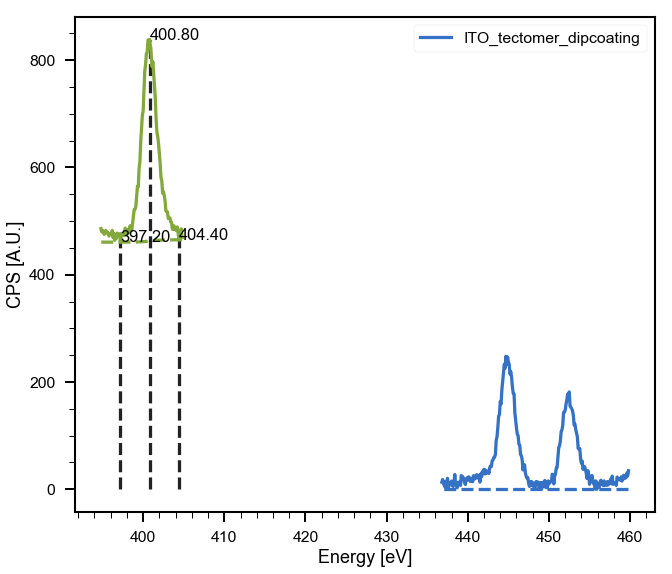

In [170]:
bg_exps[2] = subtract_double_shirley(bg_exps[2], 'In3d_SA', xlim=448.4, maxit=20);
bg_exps[2] = subtract_shirley_bg(bg_exps[2], 'N1s_SA', maxit=20);

In [154]:
len(bg_exps)

3

## Plot Bg subtraction

In [171]:
trim_spectra(bg_exps[0], bg_exps[1], 'N1s', inplace=True)
trim_spectra(bg_exps[1], bg_exps[0], 'C1s', inplace=True)

trim_spectra(bg_exps[0], bg_exps[1], 'In3d', inplace=True);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


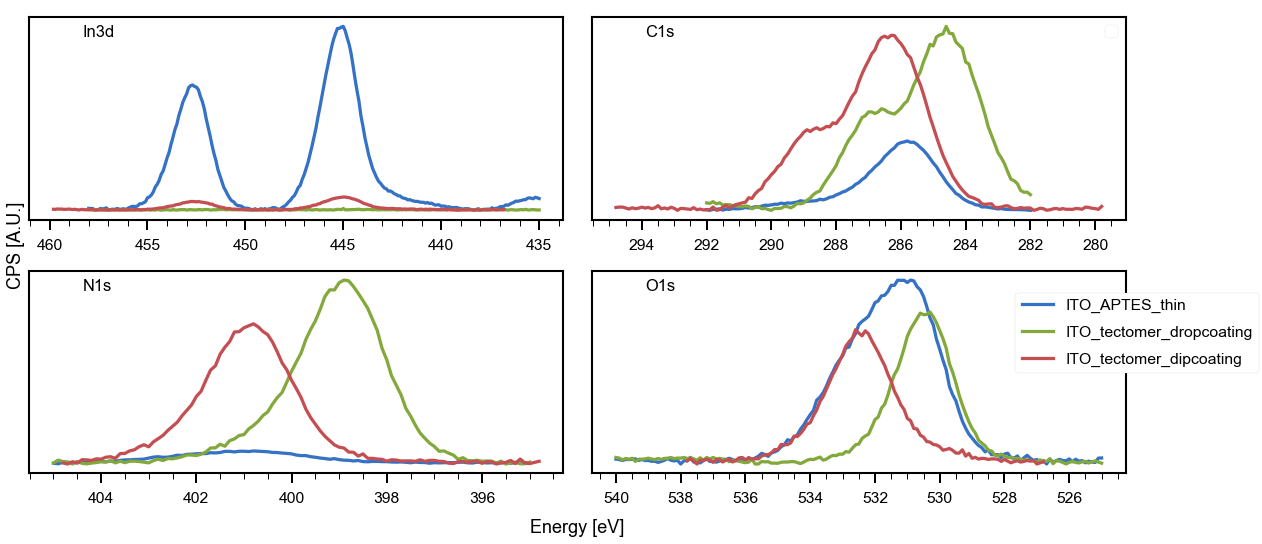

In [172]:
regions = ['In3d', 'C1s', 'N1s', 'O1s']
plot_xp_regions(bg_exps, regions, ncols=2);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


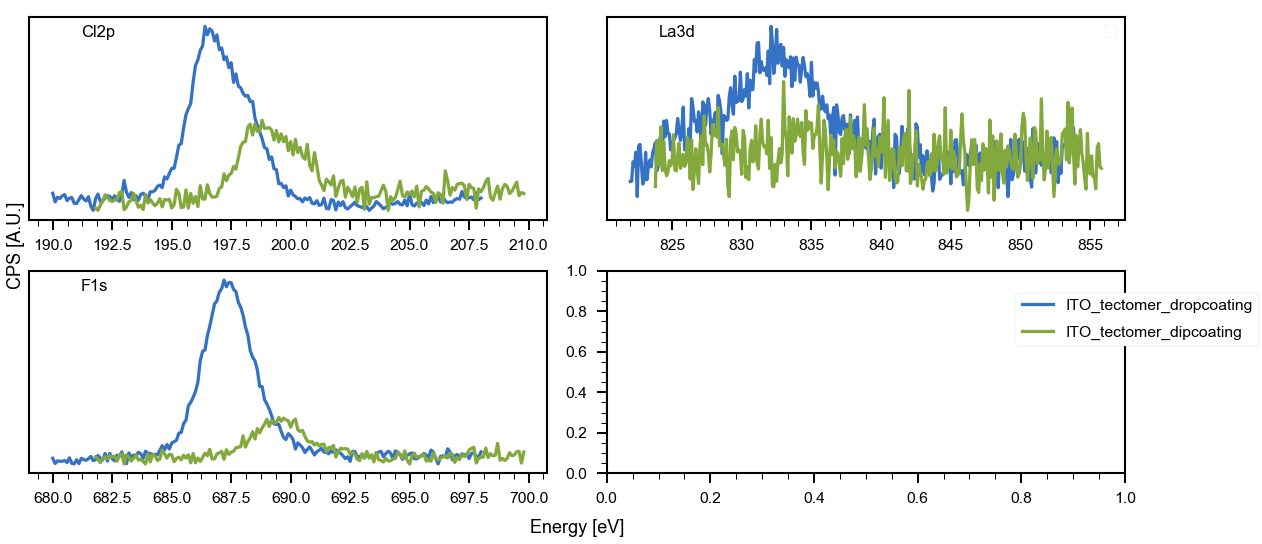

In [165]:
regions = ['Cl2p', 'La3d', 'F1s']
plot_xp_regions(bg_exps, regions, ncols=2);

# Integrate and Stoichiometry

In [173]:
for xp in bg_exps:
    xp.area = {}

'Si2p' region does not exist in ITO_tectomer_dropcoating
'Cl2p' region does not exist in ITO_APTES_thin
'F1s' region does not exist in ITO_APTES_thin
'La3d' region does not exist in ITO_APTES_thin
'La3d' , asf missing, returning raw area
'La3d' , asf missing, returning raw area
'In3d_SA' region does not exist in ITO_APTES_thin
'In3d_SA' region does not exist in ITO_tectomer_dropcoating
'N1s_SA' region does not exist in ITO_APTES_thin
'N1s_SA' region does not exist in ITO_tectomer_dropcoating


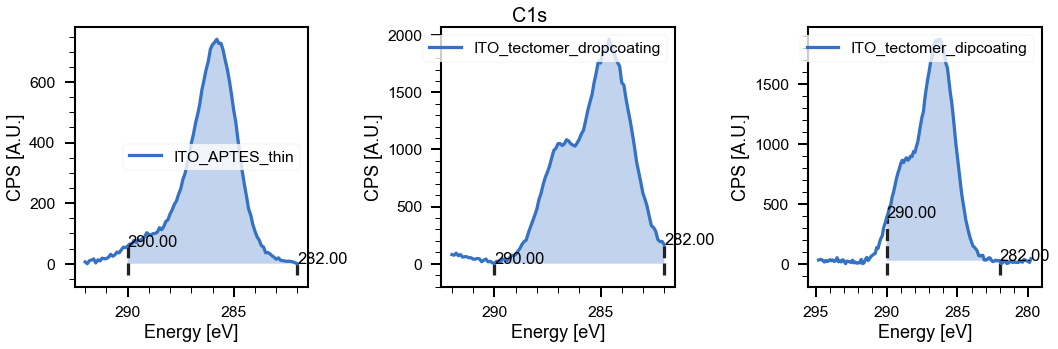

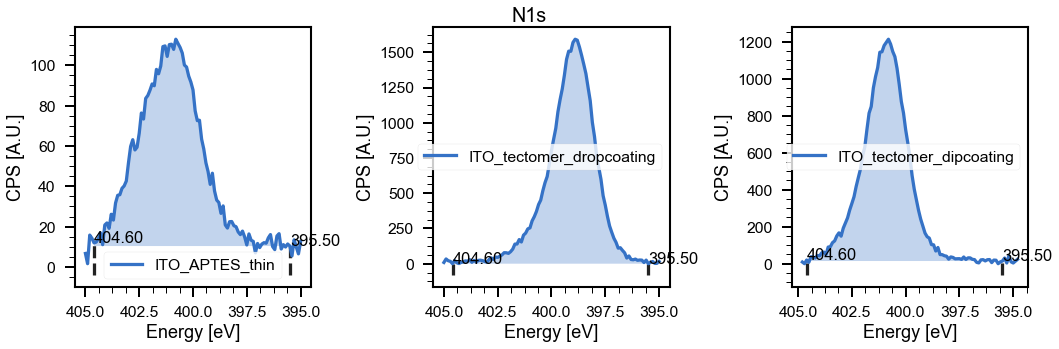

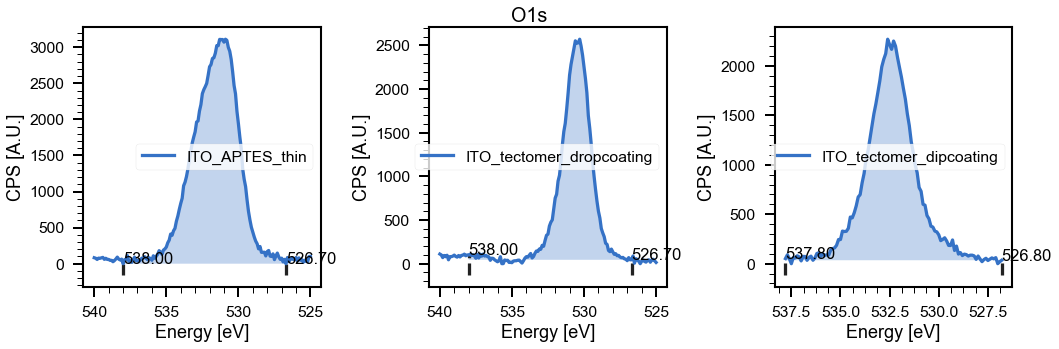

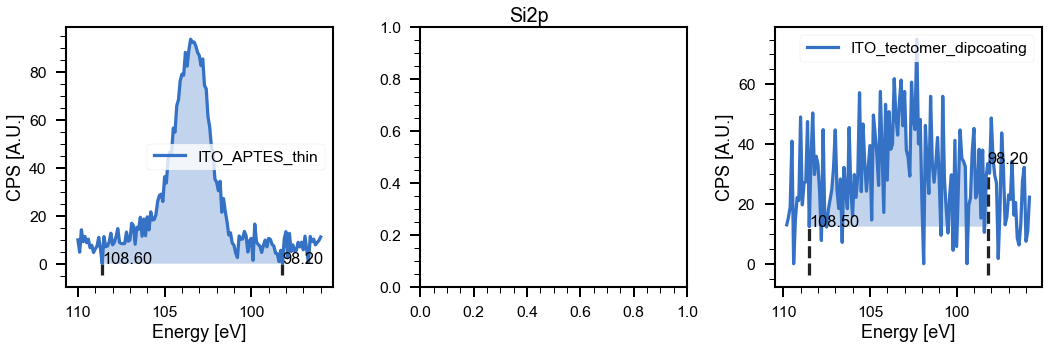

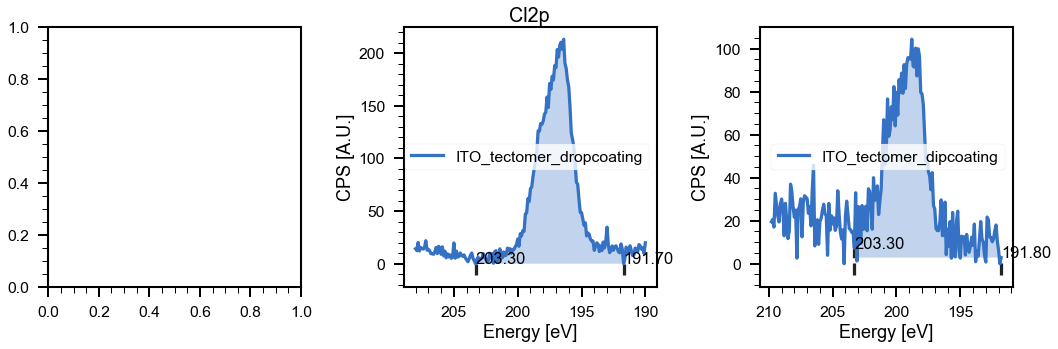

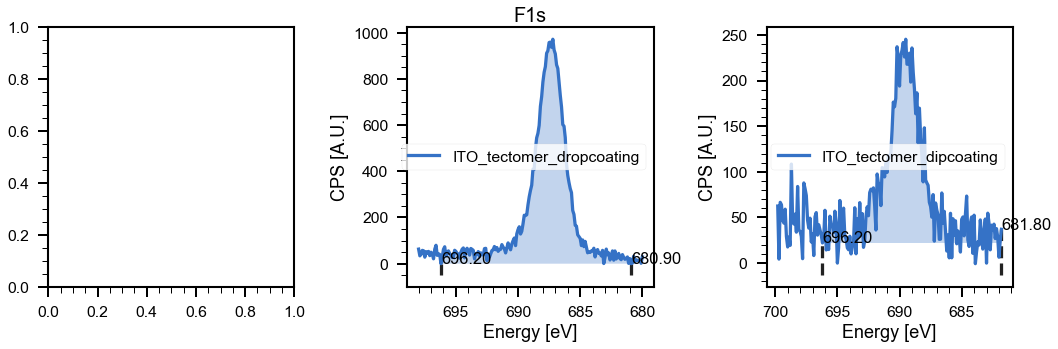

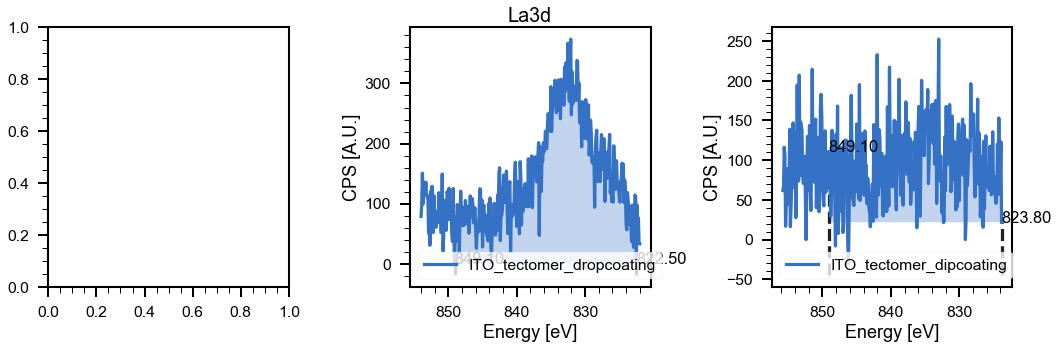

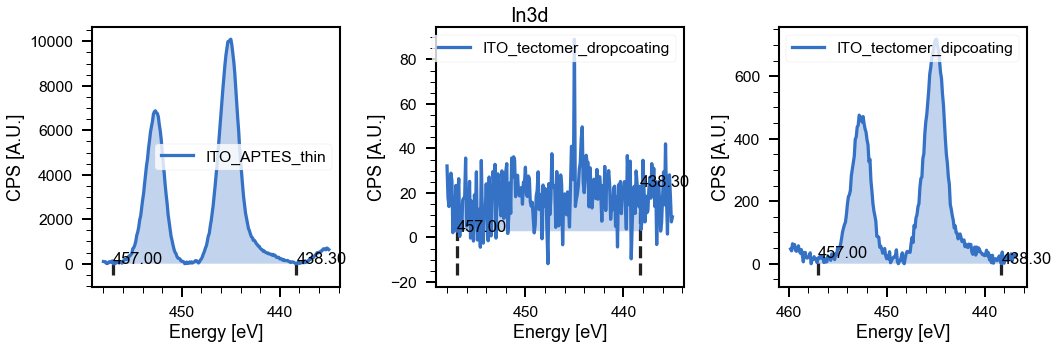

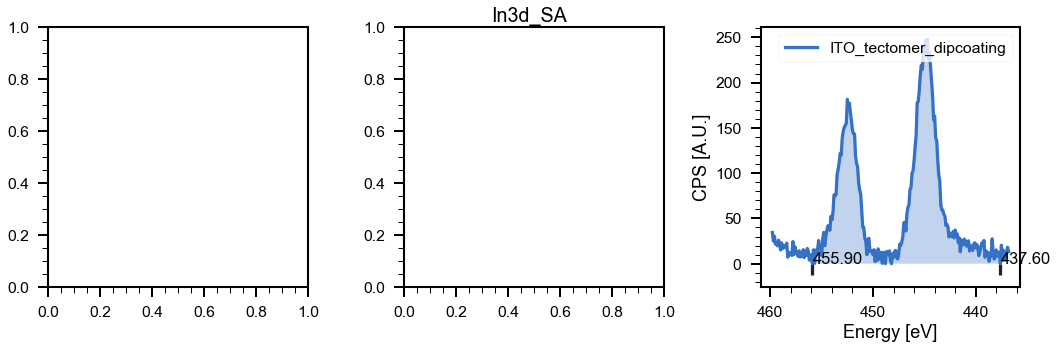

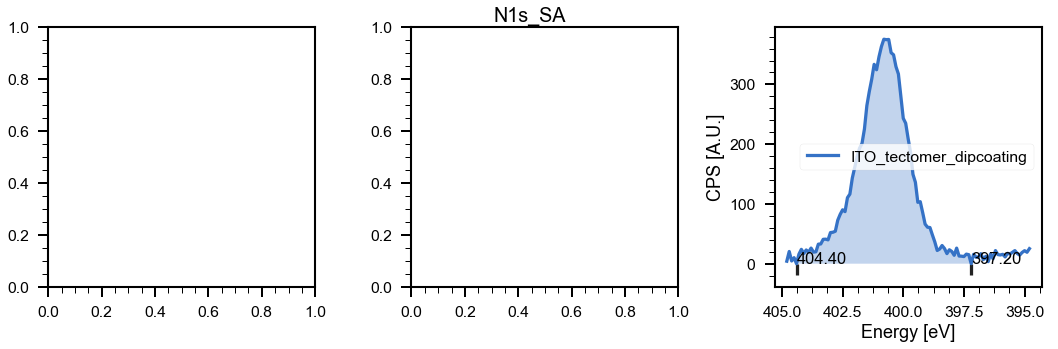

In [221]:
asf['In3d_SA'] = asf['In3d']
asf['N1s_SA'] = asf['N1s']
regions = ['C1s', 'N1s','O1s','Si2p', 'Cl2p', 'F1s', 'La3d', 'In3d', 'In3d_SA', 'N1s_SA']
for r in regions:
    integrateRegions(bg_exps, r, asf=asf)

## Stoichiometry

In [69]:
area_ref_raptes = {'C1s':3, 'O1s': 3, 'N1s': 1, 'Si2p': 1}
stoi_raptes = XPS_experiment(name='Stoich_linked-aptes', area = area_ref_raptes)

num, denom = (('N1s', 'C1s', 'C1s', 'O1s', 'O1s'), ('Si2p', 'Si2p', 'N1s', 'N1s', 'Si2p'))
display_stoichiometry([bg_exps[0], stoi_raptes],  num=num, denom=denom)

##### Tectomer 2*(C13 N5 O4 H72) 2-tailed, C8H16(-CH2-NH-Gly5)2

In [176]:
area_ref_tect = {'C1s':26, 'O1s': 8, 'N1s': 10, }
stoi_tect = XPS_experiment(name='Stoich tectomer', area = area_ref_tect)

num, denom = (('O1s', 'C1s', 'C1s'), ('N1s', 'N1s', 'O1s'))
display_stoichiometry([bg_exps[1], bg_exps[2], stoi_tect],  num=num, denom=denom)

In [177]:
make_stoichometry_table([bg_exps[1], stoi_tect],  num=num, denom=denom)

Experiment	O/N	C/N	C/O	
ITO_tectomer_dropcoating	1.10 	 2.88 	 2.62 	 
Stoich tectomer	0.80 	 2.60 	 3.25 	 


In [180]:
astotec = {'C1s': 8+(1+2*5)*2, 'O1s': 2*5*2, 'N1s': (1+5)*2, 'F1s':1e-5, 'Cl2p': 2}

stotec = XPS_experiment(name='Stoichiometry Tec2 : 2 HCl', area=astotec)

num = ['C1s', 'O1s', 'N1s', 'F1s']
denom = ['Cl2p', 'Cl2p', 'Cl2p', 'Cl2p']
display_stoichiometry([bg_exps[1], bg_exps[2], stotec], num, denom)

In [181]:
make_stoichometry_table([bg_exps[1], bg_exps[2], stotec],  num=num, denom=denom)

Experiment	C/Cl	O/Cl	N/Cl	F/Cl	
ITO_tectomer_dropcoating	29.62 	 11.29 	 10.28 	 3.91 	 
ITO_tectomer_dipcoating	47.07 	 19.02 	 13.20 	 2.24 	 
Stoichiometry Tec2 : 2 HCl	15.00 	 10.00 	 6.00 	 0.00 	 


# Thickness 

In [183]:
clean_file = '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean.uxy'
xpclean = read_processed_xp(clean_file)
proc_exps = [xpclean, bg_exps[1], bg_exps[2], bg_exps[0]]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean.uxy.ft', returning empty fit dict


In [184]:
shift = find_shift(proc_exps[0], proc_exps[1], 'In3d')
align_dfx(proc_exps[0], shift, inplace=True);

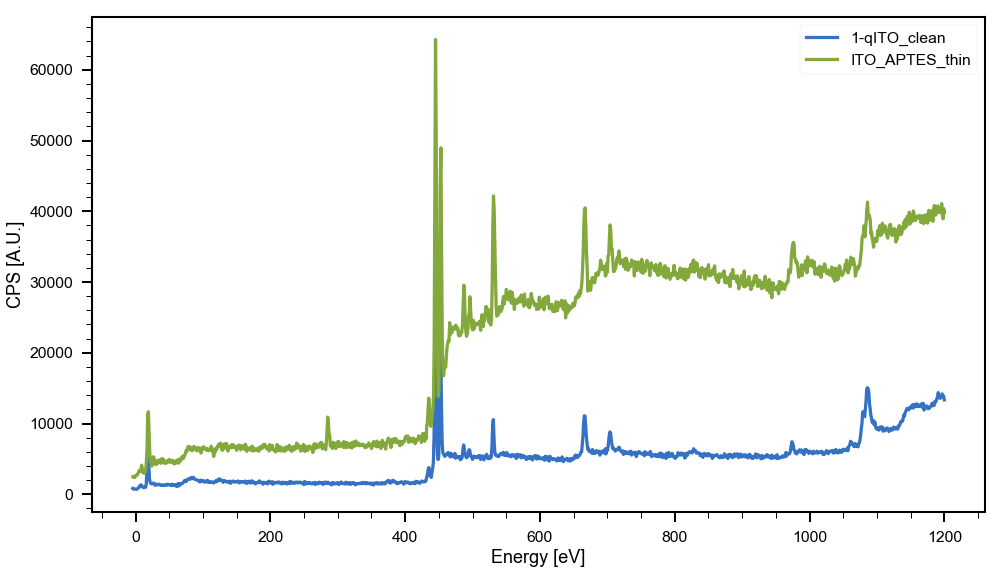

In [114]:
for xp in scaled_exps:
    plot_region(xp, 'overview')
plt.gcf().set_figwidth(16)

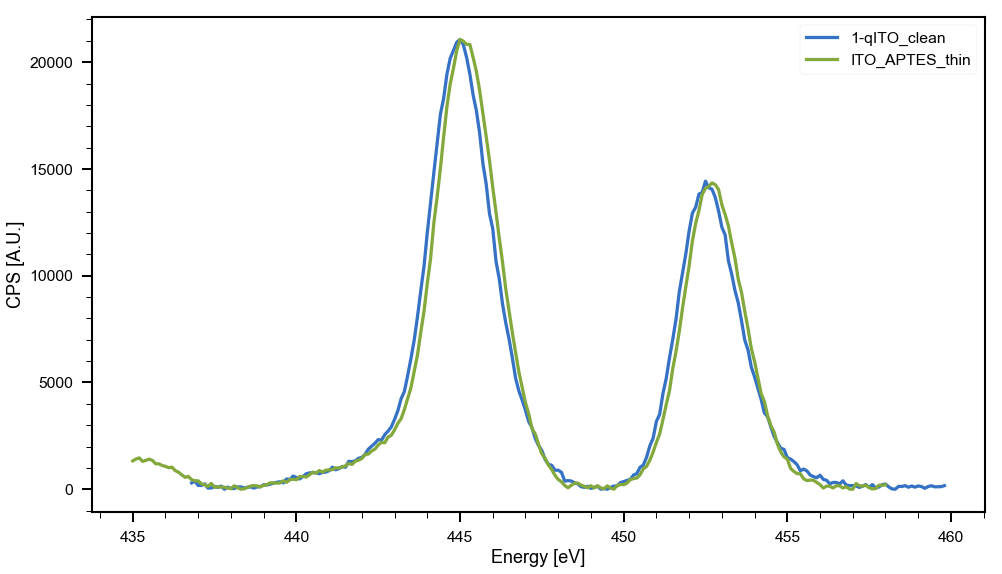

In [192]:
for xp in scaled_exps:
    plot_region(xp, 'In3d')
plt.gcf().set_figwidth(16)

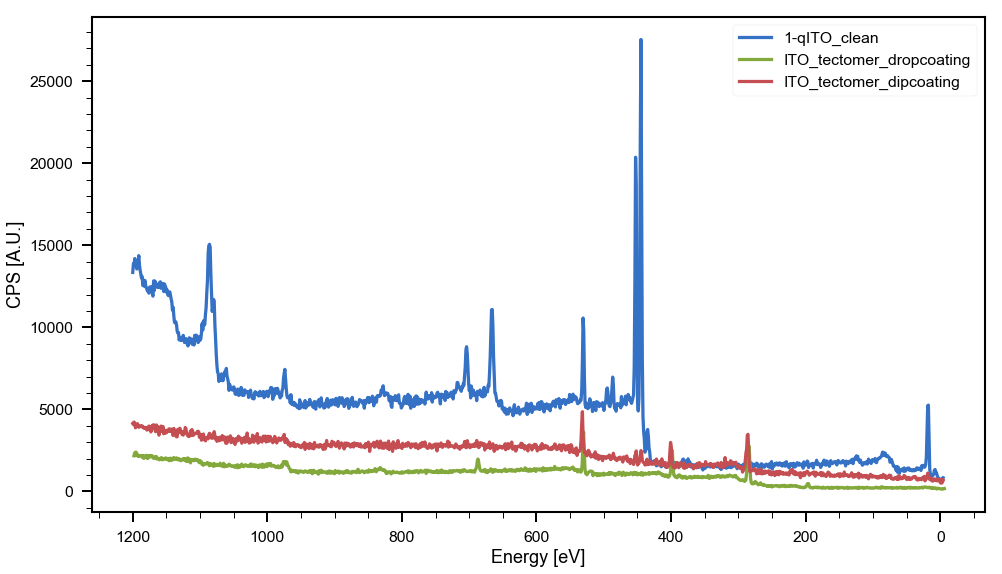

In [194]:
for xp in proc_exps[:3]:
    plot_region(xp, 'overview')
plt.gcf().set_figwidth(16)

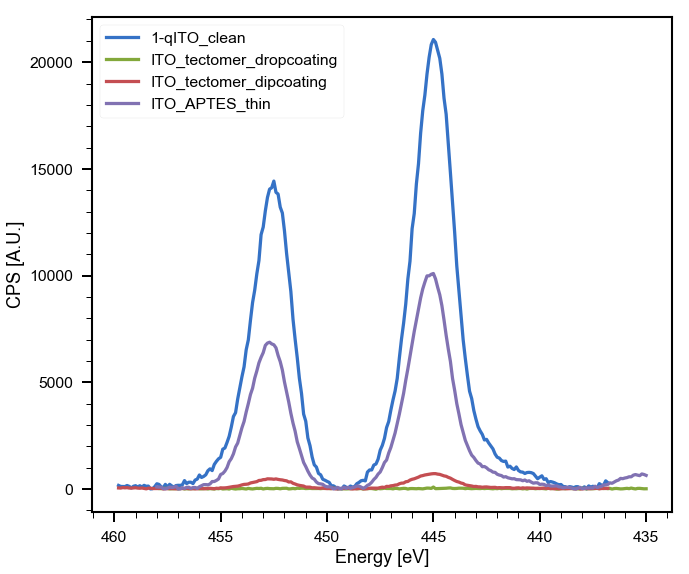

In [195]:
for xp in proc_exps:
    plot_region(xp, 'In3d')
plt.gca().invert_xaxis()

In [247]:
colors = ['b', 'g', 'r', 'm']
for xp, c in zip(proc_exps, colors):
    xp.color = c

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


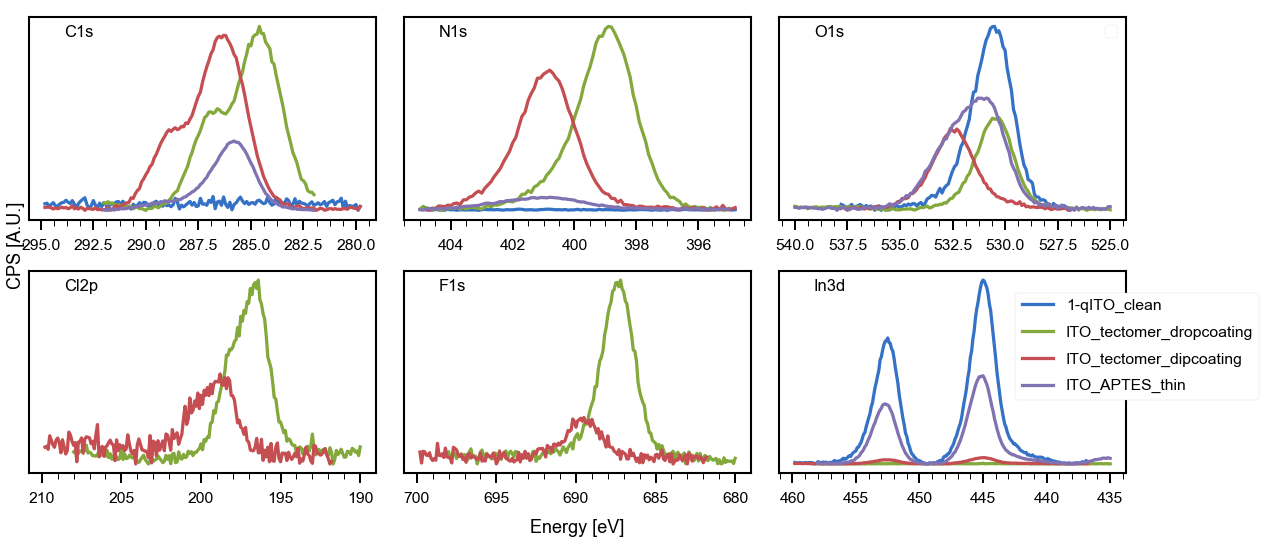

In [248]:
regions = ['C1s', 'N1s', 'O1s', 'Cl2p', 'F1s', 'In3d']
plot_xp_regions(proc_exps, regions, ncols=3);

### Coverage APTES

In [196]:
inds = [[3, 0]]
layers_aptes = arrange_coverages(proc_exps, inds,
                               r_ml = 1*nm, region='In3d', mfp = 2.88*nm, takeoff = 10)
layers_aptes

matrix([[2.07971357, 0.01647599]])

### Coverage Tectomer

In [201]:
inds = [[1, 2, 0]]
layers_aptes = arrange_coverages(proc_exps, inds,
                               r_ml = 1*nm, region='In3d', mfp = 2.93*nm, takeoff = 10)
layers_aptes

matrix([[15.44900595,  0.13917433],
        [ 9.56424919,  0.05098358]])

# Compare Large and Small Area experiments

No handles with labels found to put in legend.
No handles with labels found to put in legend.


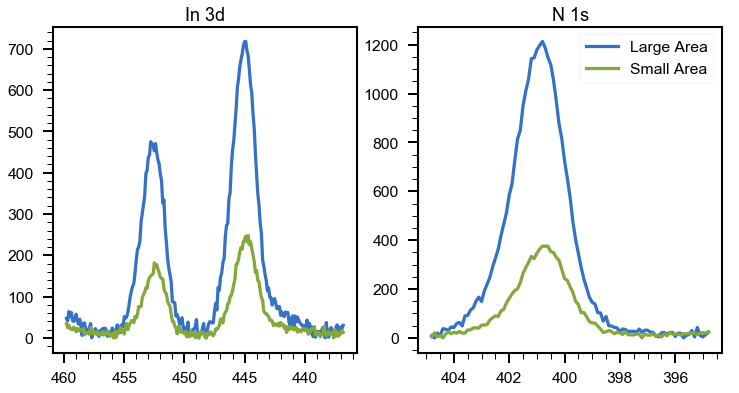

In [239]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_region(bg_exps[2], 'In3d', ax=ax[0])
plot_region(bg_exps[2], 'In3d_SA', ax=ax[0])
ax[0].set(title='In 3d')
ax[0].invert_xaxis()

plot_region(bg_exps[2], 'N1s', ax=ax[1], lb='Large Area')
plot_region(bg_exps[2], 'N1s_SA', ax=ax[1], lb='Small Area')
ax[1].set(ylabel=None, xlabel=None, title='N 1s')
ax[1].invert_xaxis()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


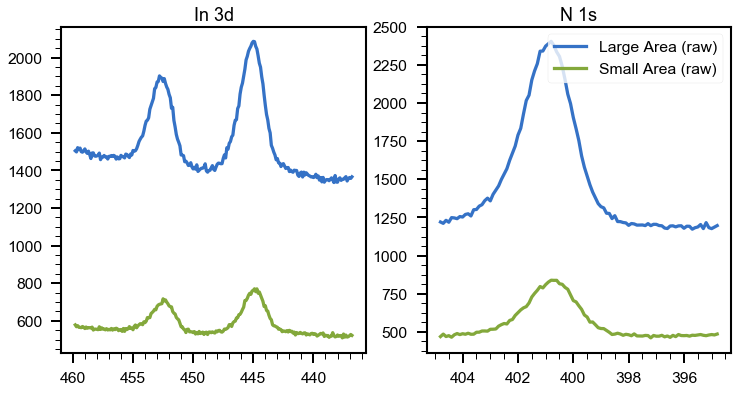

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_region(experiments[2], 'In3d', ax=ax[0])
plot_region(experiments[2], 'In3d_SA', ax=ax[0])
ax[0].set(title='In 3d')
ax[0].invert_xaxis()

plot_region(experiments[2], 'N1s', ax=ax[1], lb='Large Area (raw)')
plot_region(experiments[2], 'N1s_SA', ax=ax[1], lb='Small Area (raw)')
ax[1].set(ylabel=None, xlabel=None, title='N 1s')
ax[1].invert_xaxis()


In [225]:
num, denom = (('N1s', 'N1s_SA', ), ('In3d', 'In3d_SA', ))
display_stoichiometry([bg_exps[1], bg_exps[2]],  num=num, denom=denom)

In [226]:
num, denom = (('N1s', 'In3d', ), ('N1s_SA', 'In3d_SA', ))
display_stoichiometry([bg_exps[1], bg_exps[2]],  num=num, denom=denom)

#### LA / SA ≈ 1400

Typical spot diameters: LA ø = 5 mm, SA ø = 0.1 mm

Max angle acceptance: LA α = 5º, SA α = 9º

$$ \frac{I_{LA}}{I_{SA}} = \frac{5^2 \sin 5º}{0.1^2 \sin 9º} \approx 1400 $$

In [233]:
5**2/0.1**2 * np.sin(5*np.pi/180) / np.sin(9*np.pi/180)

1392.8475212486578

# Store processed experiments

In [190]:
def store_fits(xp: XPS_experiment, path: str = None):
    """Store fits of a XPS_experiment in separate file"""
    if path == None:
        path = xp.path + '.ft'
    else:
        path += '.ft'
    with open(path, 'w') as fout:
        for k in xp.fit.keys():
            fout.write('XPFit %s:\n\n' %k)
            dump_region = xp.fit[k].dumps()
            fout.write(dump_region + '\n\n')
    print('Storing of file %s successful' %path)
    
def write_processed_xp(filepath : str, xp : XPS_experiment):
    """Save processed XPS experiment to file"""
    import csv;
    with open(filepath, 'w') as fout:
        writer = csv.writer(fout, delimiter='=')
        for att in xp.__dict__.keys():   # Loop over class attributes except dfx (last)
            if (att != 'dfx') and (att != 'ls'):
                writer.writerow([att, getattr(xp, att)])
        writer.writerow(['dfx', ''])
        xp.dfx.to_csv(fout, sep=',')

    if xp.fit != {}: store_fits(xp, filepath)
        
def store_uxy_sxy(bg_exps: list, scaled_exps: list):

    for xpu, xps in zip(bg_exps, scaled_exps):
        filepath, filename = os.path.split(xpu.path)
        filename = os.path.splitext(filename)[0]
        newpath = filepath + '/proc/'
        try:
            os.mkdir(newpath)
        except FileExistsError: pass
        print('Stored ', newpath + filename)
        write_processed_xp(newpath + filename + '.uxy', xpu)
        write_processed_xp(newpath + filename + '.sxy', xps)

In [203]:
for xpu in bg_exps:
    filepath, filename = os.path.split(xpu.path)
    filename = os.path.splitext(filename)[0]
    newpath = filepath + '/proc/'
    try:
        os.mkdir(newpath)
    except FileExistsError: pass
    print('Stored ', newpath + filename)
    write_processed_xp(newpath + filename + '.uxy', xpu)

Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210427_ITO_APTES_thin
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210708_ITO_tectomer
Stored  /Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210920_2-qITO_Tectomer2tail_dip_coating
